In [1]:
import itertools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import sys
import threading
import os
from IPython.display import clear_output

In [2]:
## Find the starting collaboration year for each author
def get_start_Y(aut):
    YEARS = [str(year) for year in range(1990,2019)]    
    for y in YEARS:
        val = aut[y].values[0]
        if(val != 0):
            return y
        
# add starting publication year to each row of the dataset
def add_start_publication_y(df, pub_df):
    df["start_year"] = [0 for i in range(len(df))]
    i = 0
    for id in df["ID"]:
        
        if(i%500 == 0):
            print("done", i, "on", len(df), end='\r')
        i+=1
        
        aut = df.loc[df["ID"] == id]
        df.loc[df.ID == id, "start_year"] = get_start_Y(pub_df.loc[pub_df["ID"] == id])
    return df

In [ ]:
# write a collaboration dataset copy with starting year
publications_df = pd.read_csv('myDATA/02-publication_df.csv')
collaboration_df = pd.read_csv('myDATA/00-collaboration_df.csv')
collaboration_df_with_start_year = add_start_publication_y(collaboration_df, publications_df)
collaboration_df_with_start_year.to_csv('myDATA/00-collaboration_df_with_starting_years.csv', index=False))

In [3]:
collaboration_df_with_start_year = pd.read_csv('myDATA/00-collaboration_df_with_starting_years.csv')
collaboration_df_with_start_year

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,start_year
0,8958327900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2000
1,6508297663,0,0,0,0,0,0,0,0,0,...,7,7,8,8,8,8,8,8,8,1995
2,7004267341,0,0,0,0,0,0,0,0,0,...,10,10,16,16,16,16,16,16,16,2008
3,8642393600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,7,7,7,2015
4,55873955900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,8,8,8,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232833,6507630481,0,0,0,0,0,0,0,0,0,...,18,18,18,18,29,29,29,29,29,2002
232834,24577815500,0,0,0,0,0,0,0,0,0,...,4,4,4,6,13,16,16,16,70,2003
232835,57195243976,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,8,8,2017
232836,35328962100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,3,2010


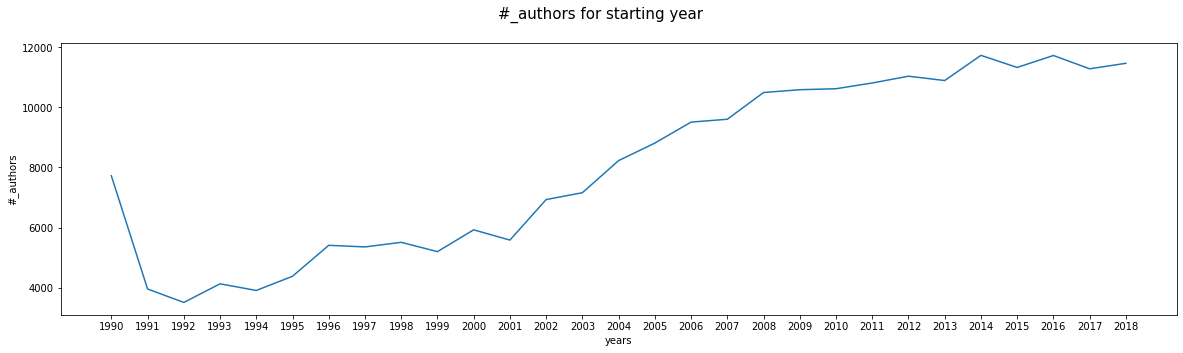

In [11]:
# print the starting year distribution for each author
collaboration_df_with_start_year = pd.read_csv("myDATA/00-collaboration_df_with_starting_years.csv")

num_auths = []
YEARS = [str(year) for year in range(1990,2019)]  

for y in YEARS:
    num_auths.append(len(collaboration_df_with_start_year.loc[collaboration_df_with_start_year['start_year']==int(y)]))

fig = plt.figure(figsize=(20, 5))
fig.suptitle('#_authors for starting year', fontsize=15)
plt.plot(YEARS,num_auths)
plt.xlabel('years')
plt.ylabel('#_authors')
fig.savefig('myDATA/start_year_distribution')
plt.show()